<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20raw%20now%20dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 41kB/s 
     |████████████████████████████████| 3.2MB 39.2MB/s 
     |████████████████████████████████| 491kB 44.3MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [3]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [4]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [7]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


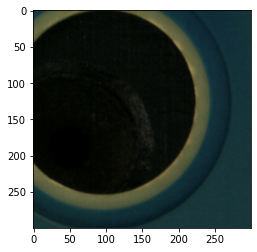

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [10]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [11]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
51.097008
53.87489
3.78475 3.78475
-0.9484383 -0.9484383


In [12]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

[0. 1.]


In [13]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [14]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import add
from keras.utils import plot_model
from keras import regularizers
import keras

input1 = keras.layers.Input(shape=(300,300,3))

x1 = Conv2D(200,(3,3),strides=(2,2) ,activation='relu',kernel_regularizer=regularizers.l2(0.01))(input1)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(100,(2,2),strides=(2,2) ,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)

x9= Conv2D(100,(2,2),strides=(1,1) ,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= AveragePooling2D((7, 7), strides=(1, 1))(x11)


o=keras.layers.Flatten()(x12)








out = keras.layers.Dense(500,activation="relu",kernel_regularizer=regularizers.l2(0.01))(o)
out=keras.layers.Dropout(0.2,seed=1)(out)
out = keras.layers.Dense(500,activation="relu",kernel_regularizer=regularizers.l2(0.01))(out)
out=keras.layers.Dropout(0.4,seed=1)(out)
out = keras.layers.Dense(100,activation="relu",kernel_regularizer=regularizers.l2(0.01))(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 200)     5600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 149, 149, 200)     800       
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 200)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 100)       80100     
__

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [16]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [17]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain,batch_size=60,epochs=50,shuffle='true', verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
1788/1788 [==============================] - 246s 138ms/step - loss: 18.8091 - acc: 0.9211
Epoch 2/50
1788/1788 [==============================] - 236s 132ms/step - loss: 18.5348 - acc: 0.9457
Epoch 3/50
1788/1788 [==============================] - 237s 133ms/step - loss: 18.3127 - acc: 0.9457
Epoch 4/50
1788/1788 [==============================] - 237s 133ms/step - loss: 18.0766 - acc: 0.9457
Epoch 5/50
1788/1788 [==============================] - 236s 132ms/step - loss: 17.8621 - acc: 0.9457
Epoch 6/50
1788/1788 [==============================] - 237s 132ms/step - loss: 17.6432 - acc: 0.9457
Epoch 7/50
1788/1788 [==============================] - 237s 132ms/step - loss: 17.4300 - acc: 0.9474
Epoch 8/50
1788/1788 [==============================] - 237s 133ms/step - loss: 17.2211 - acc: 0.9457
Epoch 9/50
1788/1788 [==============================] - 236s 132ms/step - loss: 17.0102 -

In [18]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.31      0.44        52
     class 1       0.96      1.00      0.98       829

    accuracy                           0.95       881
   macro avg       0.88      0.65      0.71       881
weighted avg       0.95      0.95      0.94       881



In [19]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.81      0.90        97
     class 1       0.99      1.00      0.99      1691

    accuracy                           0.99      1788
   macro avg       0.99      0.91      0.95      1788
weighted avg       0.99      0.99      0.99      1788

